# Scientific Computing: Exercise Set 2

Author: 
- Kevin de Vries

Student number:
- 10579869

This environment makes use of Python version 3.6.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from source_exercise2 import *

np.random.seed(1234)

## Diffusion Limited Aggregation: PDE

In [2]:
# Define initial and boundary conditions
init_c = lambda x,y: np.ones((x.size,y.size)) * y[None,:]

bound_y0 = lambda x: 0
bound_yN = lambda x: 1

# Initialize the fixed parameters
n_iter = 1500

N = 512
misc = xmin,xmax = 0,1
eps = 10**-5
omega = 1.9

100%|██████████| 1500/1500 [06:50<00:00,  4.52it/s]


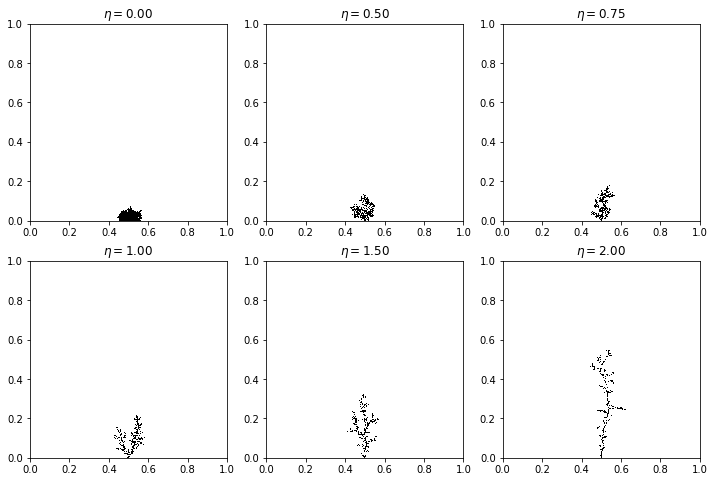

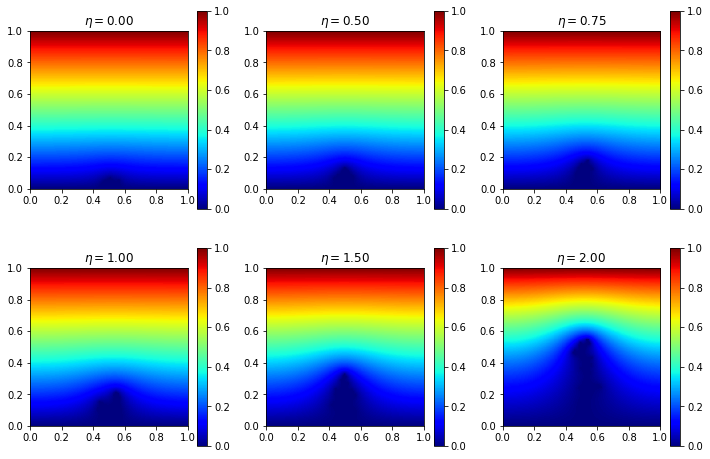

In [3]:
etas = [0,0.5,0.75,1.0,1.5,2.0]

fig1,sub1 = plt.subplots(2,3,figsize=(12,8))
fig2,sub2 = plt.subplots(2,3,figsize=(12,8))

for n in range(len(etas)):
    # initialize object grid
    obj_grid = object_grid(N+1,N+1)
    obj_grid.load_rectangle(N//2,N//2,1,1)
    
    sub1[n//3][n%3].set_title(r"$\eta = %.2f$" % etas[n])
    sub2[n//3][n%3].set_title(r"$\eta = %.2f$" % etas[n])
    
    dla_c,dla_grid = DLA_pde(n_iter,N,eps,init_c,(bound_y0,bound_yN),misc,obj_grid,omega,etas[n])

    sub1[n//3][n%3].imshow(obj_grid.grid.T,extent=[0,1,0,1],origin='lower',cmap='Greys')
    cur_im = sub2[n//3][n%3].imshow(dla_c.T,extent=[0,1,0,1],origin='lower',cmap='jet')
    
    fig2.colorbar(cur_im,ax=sub2[n//3][n%3])

plt.show()

## Diffusion Limited Aggregation: Monte Carlo

In [4]:
c_size = 1000
N = 200

misc = xmin,xmax = 0,1

100%|██████████| 1000/1000 [09:24<00:00,  1.77it/s]


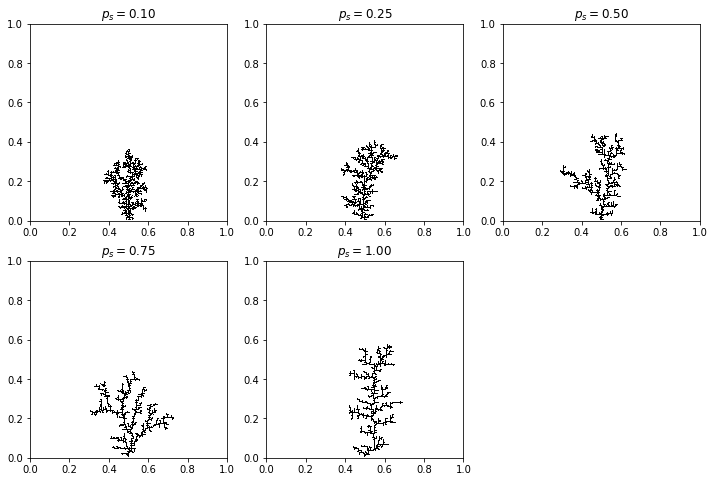

In [5]:
probs = [0.1,0.25,0.5,0.75,1.0]

plt.figure(figsize=(12,8))
for n in range(len(probs)):
    # initialize object grid
    obj_grid = object_grid(N+1,N+1)
    obj_grid.load_rectangle(N//2,N//2,1,1)
    
    plt.subplot(2,3,n+1)
    plt.title(r"$p_s = %.2f$" % probs[n])
    
    dla_grid = DLA_MC(c_size,N,obj_grid,ps=probs[n])
    dla_bool = dla_grid.get_boolean_grid()

    plt.imshow(dla_grid.grid.T,extent=[0,1,0,1],origin='lower',cmap='Greys')
    
plt.show()

## Reaction-Diffusion: Gray-Scott

In [2]:
np.random.seed(2345)

In [3]:
def plot_gray_scott(u,v,N,M,dx,dt):
    fig,sub = plt.subplots(2,5,figsize=(20,8))
    
    # Return t values to visualize
    t_range = M // 4 * np.arange(5)
    
    for i in range(5):
        sub[0,i].set_title(r"$u$, $t = %.3f$" % (t_range[i]*dt))
        im_u = sub[0,i].imshow(u[t_range[i],:,:].T,extent = [0,N*dx,0,N*dx],origin="lower",cmap="jet")   
        fig.colorbar(im_u,ax=sub[0,i])

        sub[1,i].set_title(r"$v$, $t = %.3f$" % (t_range[i]*dt))
        im_v = sub[1,i].imshow(v[t_range[i],:,:].T,extent = [0,N*dx,0,N*dx],origin="lower",cmap="jet")
        fig.colorbar(im_v,ax=sub[1,i])
        
def init_u(x,y,scale=0.01): 
    return 0.5 + scale * np.random.uniform(-1,1,(x.size,y.size))

def init_v(x,y,scale=0.01):
    res = np.random.uniform(0,scale,(x.size,y.size))
    res[x.size//2-2:x.size//2+3,y.size//2-2:y.size//2+3] = 0.25
    return res

### Default parameters

In [4]:
# Initialize the fixed parameters
step = N,M,dx,dt = 100,5000,1.0,1.0

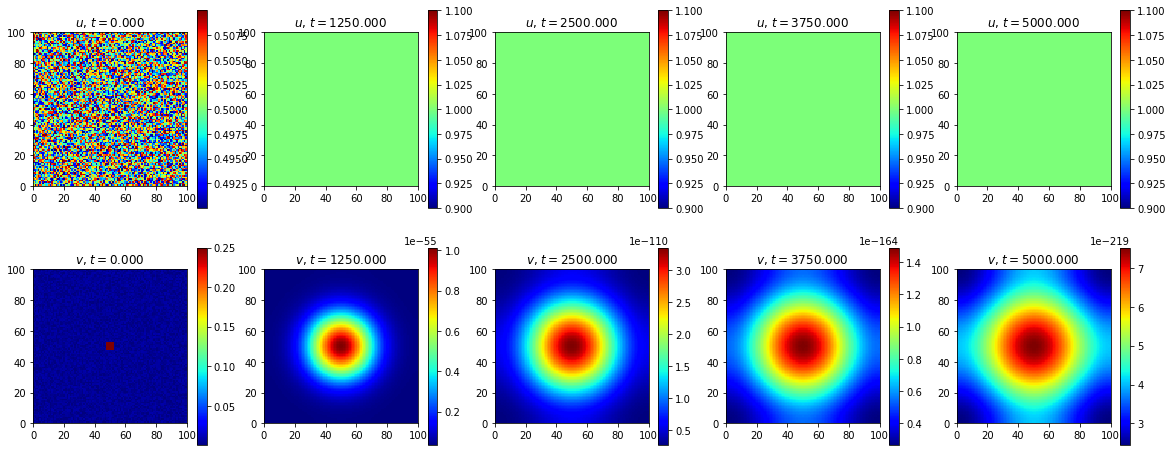

In [5]:
misc = f,k,Du,Dv = 0.035,0.060,0.16,0.08

wrap_u = lambda x,y: init_u(x,y,scale=0.01)
wrap_v = lambda x,y: init_v(x,y,scale=0.01)

u,v = gray_scott_periodic(step, (wrap_u,wrap_v), misc)

plot_gray_scott(u,v,N,M,dx,dt)
plt.show()

### Default parameters with larger noise

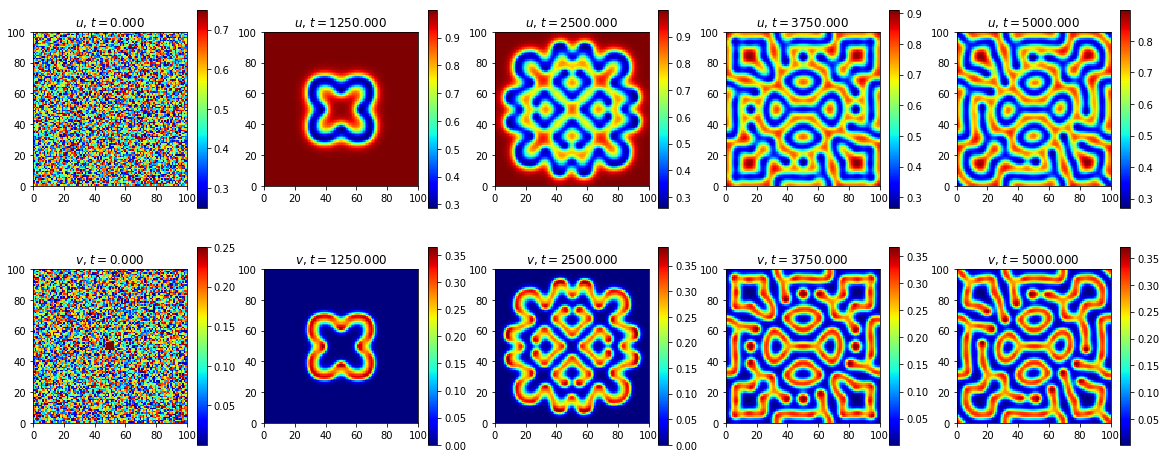

In [6]:
misc = f,k,Du,Dv = 0.035,0.060,0.16,0.08

wrap_u = lambda x,y: init_u(x,y,scale=0.25)
wrap_v = lambda x,y: init_v(x,y,scale=0.25)

u,v = gray_scott_periodic(step, (wrap_u,wrap_v), misc)

plot_gray_scott(u,v,N,M,dx,dt)
plt.show()

### Dynamic patterns

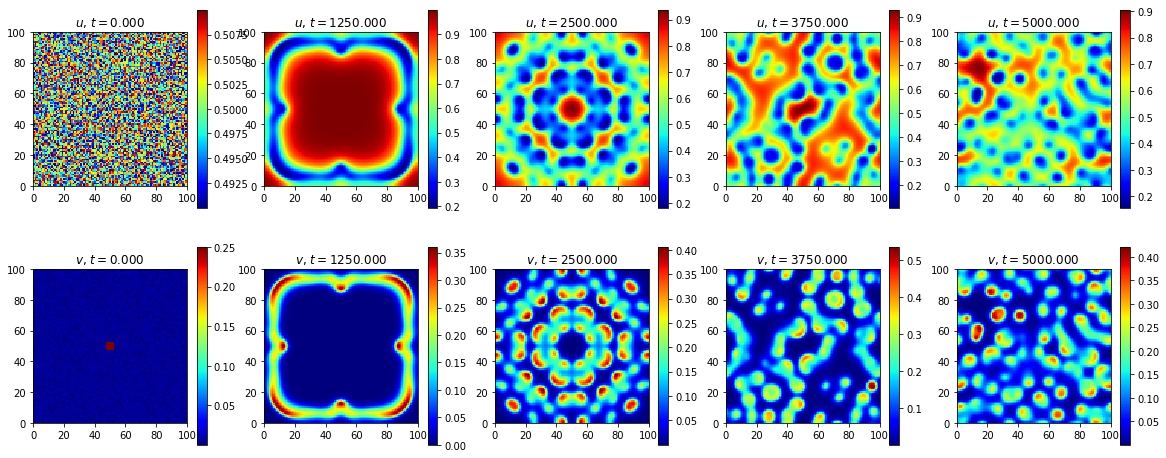

In [7]:
misc = f,k,Du,Dv = 0.017,0.05,0.2,0.08

wrap_u = lambda x,y: init_u(x,y,scale=0.01)
wrap_v = lambda x,y: init_v(x,y,scale=0.01)

u,v = gray_scott_periodic(step, (wrap_u,wrap_v), misc)

plot_gray_scott(u,v,N,M,dx,dt)
plt.show()

### Dot patterns

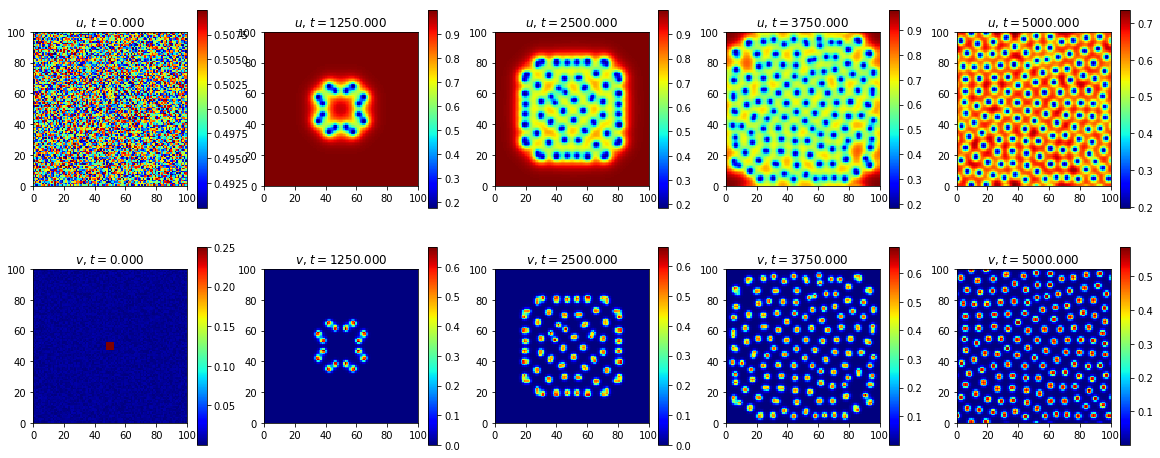

In [8]:
misc = f,k,Du,Dv = 0.02,0.077,0.2,0.035

wrap_u = lambda x,y: init_u(x,y,scale=0.01)
wrap_v = lambda x,y: init_v(x,y,scale=0.01)

u,v = gray_scott_periodic(step, (wrap_u,wrap_v), misc)

plot_gray_scott(u,v,N,M,dx,dt)
plt.show()

Standard parameter combination ($\delta x = 1.0, \delta t = 1.0$):
- $f = 0.035, k = 0.060, D_u = 0.16, D_v = 0.08$

Interesting parameter combinations ($\delta x = 1.0, \delta t = 1.0$):
- Dots: $f = 0.02, k = 0.077, D_u = 0.2, D_v = 0.035$
- Waves: $f = 0.014, k = 0.045, D_u = 0.1, D_v = 0.05$
- Pulse waves: $f=0.005, k=0.039, D_u=0.2, D_v=0.055$
- Circles: $f=0.017, k=0.027, D_u=0.2, D_v=0.01$
- Dynamic patterns: $f=0.017, k=0.05, D_u=0.2, D_v \in [0.06,0.1]$